# K-means from scratch

$$\newcommand{\vec}{\mathbf}\newcommand{\mat}{\mathbf}$$
* Cluster unlabeled data


In [65]:
using PyPlot

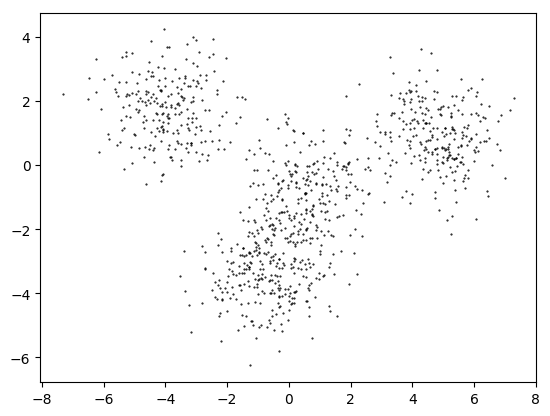

2×1000 Array{Float64,2}:
 -0.238954  -2.81391  5.79397   0.200144  …  0.143204  5.91416  5.53676 
 -4.96322    2.02804  1.2531   -2.92428      1.0862    1.59531  0.095083

In [66]:
# number of data points
N = 1000
# number of dimensins
n = 2
# generate random data
srand(1234)
x = randn(n,N)
nc = 4
xc_true = 3 * randn(n,nc)

for i = 1:N
    ic = rand(1:nc)
    x[:,i] = xc_true[:,ic] + randn(2)
end

plot(x[1,:],x[2,:],"k.",markersize = 1);
x

Let's try to find the centroid of the k clusters. Here k is 4 

In [67]:
k = 4

4

 Pick $k$ random elements of $x$ as initial centroids. This is the Forgy method for initialization.

In [68]:
xc = x[:,rand(1:N,k)]

2×4 Array{Float64,2}:
 1.55109   -1.45972   0.626195  -1.15342 
 0.107881  -3.70148  -3.82496   -0.554834

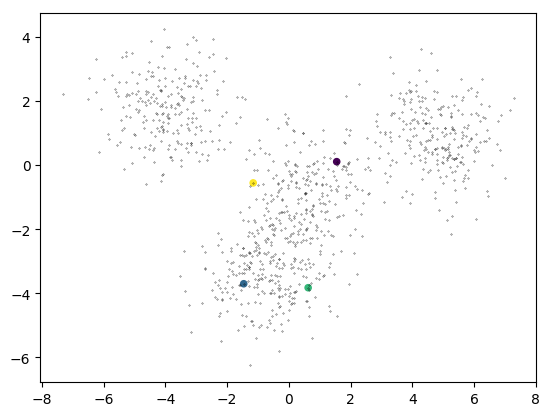

In [69]:
plot(x[1,:],x[2,:],"k.",markersize=0.5)
scatter(xc[1,:],xc[2,:],20,1:k);

We are just using the Euclidian distance here

In [70]:
distance(x,y) = sum((x-y).^2)

distance (generic function with 1 method)

To each data point $x_i$ (`x[:,i]`) assign the label correspond to the closest centroid.

In [71]:
label = zeros(Int,N)

function assignlabel!(x,xc,distance,label)
    N = size(x,2)
    k = size(xc,2)
    for i = 1:N
      mindist = 1e10
      for j = 1:k
        dist = distance(x[:,i],xc[:,j])
        if dist < mindist
           label[i] = j
           mindist = dist
        end
      end
    end
end
assignlabel!(x,xc,distance,label)

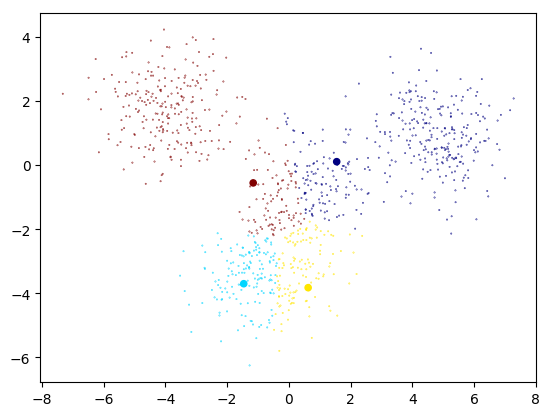

In [72]:
function plotcluster(x,label,xc)
    k = size(xc,2)
    scatter(xc[1,:],xc[2,:],20,1:k; cmap = "jet")
    scatter(x[1,:],x[2,:],0.1,label; cmap = "jet")
end
plotcluster(x,label,xc);

Update the centroids `xcnew` based on the labels

In [73]:
function updatemeans!(x,label,xcnew)
  k = size(xcnew,2)

  for j = 1:k;
    xcnew[:,j] = mean(x[:,label .== j],2)
  end
end

xcnew = similar(xc)
updatemeans!(x,label,xcnew)
xcnew

2×4 Array{Float64,2}:
 3.58948   -1.40562   0.438302  -2.90465
 0.476353  -3.49479  -3.29097    0.93377

Old and new centroids (light and draker color)

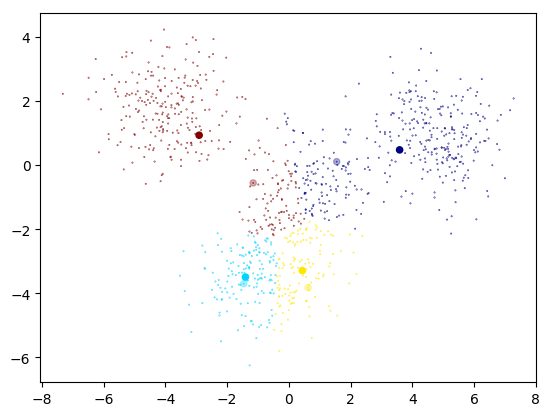

In [74]:
plotcluster(x,label,xcnew)
scatter(xc[1,:],xc[2,:],20,1:k; cmap = "jet", alpha = 0.3);

Iterate over label assignmement and updating the centroids

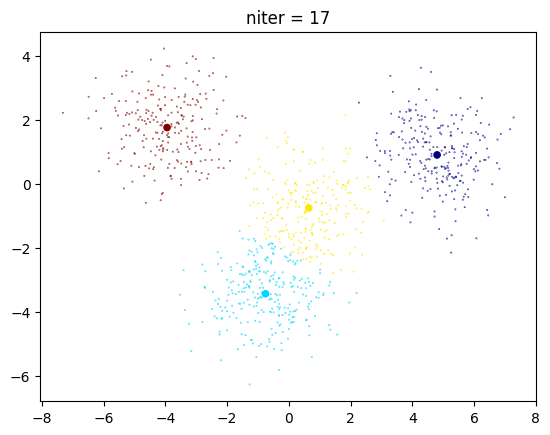

INFO: Converged


In [75]:
xc = x[:,rand(1:N,k)]
nmaxiter = 100
newlabel = zeros(Int,N)
fig = figure()
for niter = 1:nmaxiter
    assignlabel!(x,xc,distance,newlabel)
    updatemeans!(x,newlabel,xcnew)
 
    xc .= xcnew
    plotcluster(x,newlabel,xcnew)
    title("niter = $(niter)")
    sleep(1)
    IJulia.clear_output(true)
    display(fig)
    clf()
    
    if label == newlabel
        info("Converged")
        break
    end
    label .= newlabel     
end



Note how sometimes the algorithm does not converge

In [76]:
xc

2×4 Array{Float64,2}:
 4.80477   -0.754602   0.646769  -3.94462
 0.912755  -3.42157   -0.744018   1.76655

In [77]:
xc_true

2×4 Array{Float64,2}:
 -3.91166   0.526458  -0.789345  4.7484  
  1.76087  -0.828008  -3.40463   0.877456

Note the connection to the [Voroni diagram](https://en.wikipedia.org/wiki/Voronoi_diagram)
